In [20]:
#colab

# from google.colab import drive
# drive.mount('/content/gdrive')

# import sys
# sys.path.append('/content/gdrive/MyDrive/ajou_ribs/img')

import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as patches
warnings.filterwarnings(action='ignore')

---
# 수학과 201521139 이재학
### Keywords : Frechet distance, interpoint distance
---
### 진행 방식 참고:
<img src="허권논문.jpg" width="300px" height="300px">

- 하려고하는 배경(목적) -> 해결하기 위한 방법론(장단점극복) -> 새로운 방법제안
- 발표 10분

# Contents
- 논문소개                                                
- 배경지식
  - Hausdorff distance　　　　　　　　　　　　　　　　　　(21.10.27 진행)
  - Dynamic Time Warping(DTW)                         
  - Frechet Distance                    
    - Discrete Frechet Distance
    - Frechet Distance vs Discrete Frechet Distance                         
    - Time Complexity　　　　　　　　　　　　　　　　　　　(21.11.10 진행)
    - Dynamic Time Warping vs Discrete Frechet Distance
    
- 활용
  - 다차원프레셰 거리 기반 종단자료 군집분석(MFKmL)
  - 대립생성망의 성능 비교에 대한 연구 (FID)
  - 이산 프레셰 거리 척도를 이용한 궤적 유사도 고속계산 휴리스틱
- 논문분석
- 참고

---
# 논문 : [computing the frechet distance between polygonal curves](https://www.worldscientific.com/doi/abs/10.1142/S0218195995000064)    
<br/>
<img src="fd.png" width="400px" height="400px">
<br/> 
- 초록  


  - 임의의 차원에서 곡선의 유사성에 대한 측정을 하기 위해, 곡선의 매개변수화가 가능한 프레셰 거리를 고려한다.<br/>
  - 간선이 각 p,q개인 다각형 P,Q의 프레셰 거리는 O(pqlog(pq))의 runtime으로 구할 수 있다.<br/>
  - 더 나아가, 닫힌 곡선에 대한 프레셰 거리, 비단조 프레셰거리 그리고 기준이 되는 곡선 P가 다른 곡선 Q의 '일부'와의 유사성을 측정하는 프레셰 거리에 대한 변화를 고려해보려한다. 
  
- 서론
  - 실생활에서, 주어진 두 곡선의 거리는 '직관적으로' 두 곡선이 얼마나 '유사한지'로 표현된다.
  - 측정하는 거리로 '하우스 도르프 거리'가 제안된다.

---
# 배경지식
- 1.Hausdorff distance
  - 정의 :
<br/>
<img src="ha_dis.jpg" width="400px" height="400px">
<br/> 
    - 점으로 이루어진 두 집합(point sets) 간의 거리를 결정하는 방법
    
<br/> 

  - 예시 :
<br/>
<img src="hd_ex.jpg" width="500px" height="500px">
<br/>
    - 두 집합 사이의 근접점에서 떨어진 가장 먼 지점을 찾음
<br/>
    - 직관적으로, 한쪽 점 집합을 기준으로 다른쪽 집합 상의 점까지의 가장 먼 거리를 구함. 그리고 두 거리중 더 큰 것을 distance로 정함.
<br/>   
<br/>
  - 단점 :
<br/>
<img src="hd_단점.jpg" width="400px" height="400px">
<br/>
    - outlier에 취약
<br/>
    - outlier (x4,y4)을 제외하면 hausdorff 거리는 왼쪽이 훨씬 작음.
<br/>
<img src="논문단점.jpg" width="500px" height="500px">
<br/>
    - 논문에서 제기한 단점 : 두 궤적의 진행 방향이나 모양을 고려하지 않기 때문에  실제 두 궤적의 유사성을 판단하기엔 부적합
    
<br/>

  - 활용1 : 컴퓨터 비전 분야에서 주로 쓰이며, '매칭' 문제 해결을 위해 사용됩니다.
<br/>

<center>OpenCV 에서의 Template Matching</center>

<br/>
<img src="템플릿매칭.jpg" width="500px" height="500px">
<br/>

    - Template Matching : 영상에서 작은 크기의 템플릿 영상과 일치하는 부분을 찾는 기법  
    - 한 템플릿이 기준이기에 속도가 매우 느림  
    - Hausdorff distance를 이용하여, 각 템플릿에 대한 최소의 하우스 도르프 거리를 갖는 이미지 영역은 템플릿을 찾는데 가장 적합한 후보    
  - 활용2 : PostGIS(Geospatial 데이터를 다루는 SQL)
    - PostGIS에서 공간 쿼리를 다룰 때, 공간 위상관계에서 교차하는 객체를 찾아 객체간 거리 산출
    - 거리값이 작을수록 두 건물은 유사한 형상  
    - 거리 산출 수행: ST_HausdorffDistance 함수 실행
<br/>
<img src="postgis.jpg" width="600px" height="600px">
<br/>
  - 활용3 : Python Scipy Library
<br/>
<img src="scipy.jpg" width="600px" height="600px">
<br/>

In [116]:
from scipy.spatial.distance import directed_hausdorff
u = np.array([(1.0, 0.0),
              (0.0, 1.0),
              (-1.0, 0.0),
              (0.0, -1.0)])
v = np.array([(2.0, 0.0),
              (0.0, 2.0),
              (-2.0, 0.0),
              (0.0, -4.0)])

print(directed_hausdorff(u, v))
print(directed_hausdorff(v, u))

(2.23606797749979, 3, 0)
(3.0, 3, 3)


<br/>
<img src="hdextap.jpg" width="800px" height="800px">
<br/>

---
# 2021.11.10 문헌조사 및 논문정리

## 교수님 피드백

### 1. Hausdorff Distance이 정의 되는 공간? 
- 거리공간의 부분집합의 차원을 자연수에서 음이 아닌 '실수'로 확장한 것  
- 정의 : X와 Y가 비어 있지 않은 메트릭 공간(M,d)의 부분 집합(non-empty sets of points X,Y)일때,  다음과 같이 정의 함
<br/>
<img src="hadd.jpg" width="800px" height="800px">
<br/>

### 2. Dynamic Time Warping(DTW) - 동적시간워핑
<br/>
<img src="ucl.png" width="300px" height="300px">
<br/>  

- 일반적으로 시계열 신호간 유사성을 따질땐 유클리드 거리를 이용
- 장점 : 계산이 쉬움,직관적으로 이해 , 연산속도가 빠름
- 단점 : 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생 , ※길이가 다른 시계열 분석 불가※

<br/>
<img src="dtw.png" width="500px" height="500px">
<br/>

<br/>
<img src="dtw2.jpg" width="800px" height="800px">
<br/>

- 두개의 시계열 데이터가 있다고 할 때, 그 둘간의 유사도를 알아내기 위한 알고리즘
- 다른 속도, 다른 움직임을 가진 서로 다른 신호(길이도 달라도 됨)의 시간 축에 대한 파장의 유사성 측정  
- Hausdorff distance와 마찬가지로 (패턴)매칭을 해결하기 위한 개념
- 장점: ※서로 다른 길이의 시계열도 유사도 분석가능※ , GPS 데이터 등 다차원 시계열 데이터의 분석 가능  
- 단점 : 알고리즘 구현이 어렵고 연산량이 많음  
- 예1: 에어컨을 사용할때의 전력패턴을 기록한 뒤 이후에 이상패턴을 감지(ex:무단침입,실수로 냉장고 문 열어둠)
- 예2: 주식데이터 시계열 분석(price momentum)  
- 예3: 자동 음성 인식기술
- 예4: 보행 간 유사도, 생체신호 분석

---

# 알고리즘

<br/>
<img src="dtwdp.jpg" width="500px" height="500px">
<br/>

- 알고리즘 수업때 배운 Dynamic Programming의 방법 -> 위에서의 단점(알고리즘 구현이 어렵고 연산량이 많음)  
- 길이가 서로 다르므로, 적절한 index를 매칭시켜 distance 계산(한 점을 기준으로 euclidean distance가 최소가 되는 포인트를 매칭)

# 오류

<br/>
<img src="dtwd1.jpg" width="500px" height="500px">
<br/>

- 왜곡 정도에 제약을 주지 않으면, 유사하지 않은 시계열들을 유사한 것 처럼 비교할 가능성이 생김

<br/>
<img src="dtwd2.jpg" width="500px" height="500px">
<br/>

- 완전히 다른 데이터(sin, -sin) 들도 시각적으로 인식하는 것에 비해 실제 거리값을 작은 값으로 도출해 유사한 것으로 판단할 가능성이 생김

# 해결방법(Constrainted_DTW)
- Sakoe-Chiba band
- 이타쿠라 패턴(NA값 매칭X)

# 코드예시
- R라이브러리 개발자가 파이썬용으로도 개발

In [5]:
import dtw
import numpy as np

idx1=np.linspace(0,2*np.pi,100)  #0~2π,100등분
idx2=np.linspace(0,np.pi,100)    #0~π,100등분
q1=np.sin(idx1)                   #sin함수 ,0~2π,100등분 
q2=np.cos(idx1)                   #cos함수 ,0~2π,100등분
q3=np.sin(idx2)                  #sin함수 ,0~π,100등분
q4=-np.sin(idx1)                  #-sin함수 ,0~2π,100등분

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



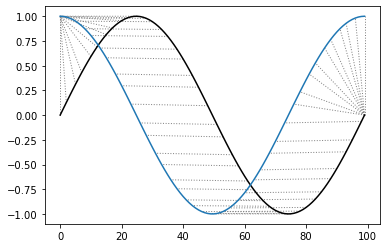

거리:27.26756800768756


In [6]:
# 같은 길이의 sin,cos
dtw.dtw(q1,q2,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q2,keep_internals=True).distance}')

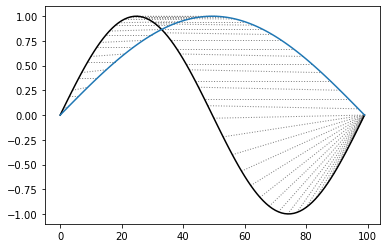

거리:32.52502131040423


In [7]:
# 다른 길이의 sin,sin (다른길이 비교가능)
dtw.dtw(q1,q3,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q3,keep_internals=True).distance}')

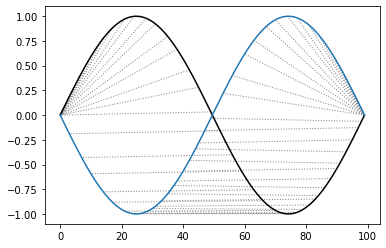

거리:65.00369703277995


In [8]:
# 같은범위의 sin, -sin (비슷한 패턴같아보이지만 정반대)
dtw.dtw(q1,q4,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q4,keep_internals=True).distance}')

---
## 2.Frechet distance
<br/>
<img src="fd.png" width="400px" height="400px">
<br/> 
- 유래 : 수학에서 곡선을 따라 점의 위치와 순서를 고려한 곡선 간의 유사도를 측정 한 것. '모리스 르네 프레셰'의 이름을 따서 명명됨  


- 정의 :
<br/>
<img src="fdd.jpg" width="500px" height="500px">
<br/>

- 변수 :
  - d:거리함수 
  - t : 0~1의 실수범위에서 궤적 A,B를 모든 시점으로 연속 단조증가시키며 전사함(surjection)  
  - α,β : t의 재매개 함수(표준화된 시간 변수)
  - A(α(t)),B(β(t)) : 궤적 A,B에서 시점 α(t),β(t) 에서의 지점

<br/>

- 설명 : 전사된 시점(t)마다 두 궤적 A,B의 지점 간 거리를 함수 d로 측정, 궤적 A,B별로 각각 α,β가 주어지고 α,β가 단조증가 함수라는 특성을 이용함  
<br/>

- 예시 : 주인과 산책하는 개의 목줄

<br/>
<img src="fde1.jpg" width="500px" height="500px">
<br/>

- 목줄로 묶인 개와 같이 산책을 하는 주인의 예시
- 가정: 주인과 개는 서로 다른 속도로 이동가능 하지만 왔던 길을 되돌아 갈 수 는 없음
- 산책하는 동안 주인과 개 사이의 목줄은 목줄이 허용 하는 길이 범위 안에서 서로 다른 궤적을 그리며 이동함
- 이 때, 두 궤적을 그리는 산책이 가능한 최소한의 목줄 길이가 ※프레셰 거리※


<br/>
<img src="fde2.jpg" width="500px" height="500px">
<br/>

<br/>
<img src="fdd.jpg" width="500px" height="500px">
<br/>

- 시점 t를 특정 α,β함수로 재매개한 시점에 의해 매칭되는 두 궤적 A,B상의 지점들마다 거리를 측정하고, 이 중 최대값을 찾는 과정을 모든 가능한 α,β마다 수행했을 때 그 최대값들 중 inf값이 프레셰 거리  
- 다른 관점에서는, 두 궤적 A,B에서 매칭된 지점마다의 거리들 중 최댓값이 INF값이 될 수 있도록 시점(t)을 재매개 하는 특정 α,β를 찾아가는 과정이라고도 볼 수 있음

##  특징
- 하우스 도르프 거리와 다르게 두 궤적의 진행방향이나 모양을 고려하여 계산하기에, 값이 작을 수록 두 궤적은 가갑고 모양도 비슷한 유사궤적이라고 판단가능(논문서론에서 제기한 개선점)  
- 이는 정의에서 단조증가함수인 α,β 가 사용되어 거리의 하한값을 찾는 다는 특성 때문에 두 궤적의 진행방향과 형태에 따른 유사성이 자연스럽게 반영되고 이 특성으로 유사성 지표로 적절하게 활용될 수 있음

<br/>
<img src="fde11.jpg" width="500px" height="500px">
<br/>

- 위의 예시에서 직관적으로 목줄이 짧을 수록 주인과 개의 산책 이동 궤적은 비슷해 질 수 밖에 없음을 알 수 있음

## 활용

<br/>
<img src="fid.jpg" width="500px" height="500px">
<br/>

- GAN을 사용한 모델에서 평가지표로 frechet distance를 활용
- Frechet Inception distance(FID)는 GAN모델에서 생성자 및 판정자 사이의 거리를 측정하는 Inception score에서 측정하는 기준으로 사용되며 이는 유사도의 판단기준으로 작을수록 품질이 좋음

---
## 3.Discrete Frechet Distance
<br/>
<img src="fd.png" width="400px" height="400px">
<br/>

# <center>↓<center/>

<br/>
<img src="ddffdd.jpg" width="500px" height="500px">
<br/>
- 유래 : 일반적인 Frechet Distance는 엄밀히는 연속적인 궤적에 적용되는 것으로, 궤적의 양이나 점의 개수가 많을경우 계산이 복잡하다. 따라서, 현실 데이터에 적용이 용이한 이산 프레셰 거리가 널리쓰인다.  

<br/>

- 정의 : Frechet Distance 에서의 근사

<br/>
<img src="dfd.jpg" width="800px" height="800px">
<br/>

- 변수 :
  - P,Q : 궤적
  - u,v : vertices  

<br/>

- 설명 : 
 - 점들의 진행방향을 고려한 점들의 순서집합에서 궤적 P,Q를 커플링한 pair들로 부터 거리를 측정함  
 - Coupling(커플링) : 두 궤적 간에 거리를 측정할 꼭짓점 끼리 쌍을 맺는 것
 
<br/>
<img src="co1.jpg" width="400px" height="400px">
<br/>

# <center>↓<center/>

<br/>
<img src="co2.jpg" width="400px" height="400px">
<br/>
    
    
 - Couplig length(커플링 길이) : 커플링 한 쌍 끼리의 거리
 - 커플링은 어느 한쪽 궤적이나 양 쪽 궤적 모두에서 한 칸씩 이동해가며 맺을 수 있지만 뒤로 돌아가거나 한 번에 두 칸 이상 이동할 수 없음
 - 이러한 커플링을 통해 커플링 길이를 최소화하며 마지막 까지 이동했을 때 가장 길었던 커플링 길이가 Discrete Frechet Distance 

- 예시 : 끈으로 묶여있는 징검다리 위 개구리 한 쌍

<br/>
<img src="ffddee1.jpg" width="500px" height="500px">
<br/>
    
# <center>↓<center/>
    
<br/>
<img src="frog2.jpg" width="500px" height="500px">
<br/>    

- 끈으로 묶여있는 두 개구리가 각자 징검다리에 놓여있음  
- 두 개구리는 한번에 한 칸 이동 또는 이동하지 않을 수 있지만, 뒤로 돌아갈 순 없음
- 위의 정의에서 두 개구리의 매 순간 위치의 쌍이 '커플링', 끈 길이가 '커플링 길이'
- 끈의 길이를 최소화 하면서 징검다리의 끝까지 이동했을때, 가장 길었던 길이가 ※discrete frechet distance※
 
<br/>
<img src="dfd.jpg" width="800px" height="800px">
<br/>
    
- 위의 정의에서 궤적 P,Q는 각 징검다리
- vertices u,v는 징검다리 돌
- paris는 끈으로 묶여있는 개구리들의 이동궤적상의 좌표

## 특징
- 관측시점이 일치하지 않아도 계산이 가능하기에, 임상분야와 같이 표본들 간 관측시점을 철저히 통제하기 어려운 분석환경에서도 굉장히 유용할 수 있음

---
## 4.Frechet Distance vs Discrete Frechet Distance

- 기본적인 계산원리는 동일함
- 프레셰 거리는 궤적의 전체구간을 계산하는 반면, 이산 프레셰 거리는 궤적의 전체 구간이 아닌 실제로 관측치가 있는 궤적의 꼭짓점 끼리의 거리만 측정한다는 점에서 차이가 있음

<br/>
<img src="fdvsdfd.jpg" width="800px" height="800px">
<br/>

- 그럼에도, 이산 프레셰 거리는 연속 프레셰 거리에 충분히 근사하는 것으로 알려져 있음

---
### Time Complexity

<br/>
<img src="bigooo.jpg" width="1000px" height="1000px">
<br/>

<center>--> 논문 본문에서 시간복잡도 및 알고리즘 계산<center/> 
    
<br/>
<img src="nm.jpg" width="1000px" height="1000px">
<br/>
    
<center>해당 논문에서는 프레셰 거리에 대한 시간복잡도를 줄이기위해 정확한 값이 아닌 근사를 통한 휴리스틱 알고리즘 제안<center/>    
    
   

---

# TODO
<br/>
<img src="dtwvsdfdnm.jpg" width="800px" height="800px">
<br/>

# <center>↓<center/>

    
<br/>
<img src="dtwvsdfdtb.jpg" width="800px" height="800px">
<br/>

- Dynamic Time Warping vs Discrete Frechet Distance
- 논문분석
- multinomial 논문
- Interpoint 논문
- Frechet Inception Distance , Inception model -> FID Python code

---
# <참고>

[유튜브 : GAN 성능의 정량적 평가 방법 - Python, Deep Learning](https://www.youtube.com/watch?v=19An2T4utEM)


# <논문>
### 메인
[computing the frechet distance between polygonal curves](https://www.worldscientific.com/doi/abs/10.1142/S0218195995000064)
### 참고
[이산 프레셰 거리 척도를 이용한 궤적 유사도 고속계산 휴리스틱](http://www.dbpia.co.kr.ssl.openlink.ajou.ac.kr/search/topSearch?startCount=0&collection=ALL&range=A&searchField=ALL&sort=RANK&query=%EC%9D%B4%EC%82%B0+%ED%94%84%EB%A0%88%EC%85%B0&srchOption=*&includeAr=false)  
[다차원 프레셰 거리 기반 종단자료 군집분석](https://dcoll.ajou.ac.kr/dcollection/srch/srchDetail/000000030579)  
[대립생성망의 성능 비교에 대한 연구](https://www.dbpia.co.kr/Journal/articleDetail?nodeId=NODE07540262)  
[The Frechet Distance between Multivariate Normal Distributions](https://www.sciencedirect.com/science/article/pii/0047259X8290077X)  
[Interpoint distances: Applications, properties, and visualization](https://onlinelibrary.wiley.com/doi/abs/10.1002/asmb.2508)
[products of Euclidean metrics and applications to proximity questions among curves](https://arxiv.org/abs/1712.06471)  

# <개념>
#### Hausdorff distance
[Hausdorff distance](https://progworks.tistory.com/72)  
[Hausdorff distance 개념](https://dhpark1212.tistory.com/entry/Hausdorff-Distance)  
[Template Matching](https://velog.io/@codren/%ED%85%9C%ED%94%8C%EB%A6%BF-%EB%A7%A4%EC%B9%AD)

#### Dynamic Time Warping
[DTW Youtube](https://www.youtube.com/watch?v=03J4xzymOWM)   
[DTW tistory1](https://hamait.tistory.com/862)  
[DTW tistory2](https://leo-bb.tistory.com/58)  

#### Frechet distance
[유튜브 : Frechet Distance Between Two Point Sets](https://www.youtube.com/watch?v=12vrDDBnEFg)  
[위키피디아](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distance)   

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
발표자료 미리옮기기, 대본없이그냥발표해보기  
dtw vs frechet distance, 어떠한 데이터에 적용이가능한지 및 structure  
인트로 +피드백이후에 시작  
허성보님꺼참고 ->frechet distance  
-->다음부터 논문분석시작
------------------
자료미리올리기
임의의곡선만들어서 계산해보기
임상데이터들은 어떻게 계산되는지 보기 비교해보기 
장단점논문에서 말한부분 테스트해보기  
-->해보기 r이나파이썬해보기
수식위주
자료올릴때 일자랑 절차맞추기 (기존에올린것도수정)
-----------------------------------
시뮬레이션하는것이목표
내노트북에 마이크랑 스피커 따로장착인가?
24일 문제은행 올리고 논문준비
전날이나 2일전에 공지드리기 ->메일 +카톡 캘린더메모


In [637]:
#시간 측정
import time
start = time.time()  # 시작 시간 저장
 
a=5
b=6
c=a+b
print(c)

print("time :", time.time() - start) 

11
time : 0.0009970664978027344


In [638]:
#frechet distance
import frechetdist
import math

In [639]:
#eulidean vs dtw
import dtw
import numpy as np

idx1=np.linspace(0,2*np.pi,100)  #0~2π,100등분
idx2=np.linspace(0,np.pi,100)    #0~π,100등분
q1=np.sin(idx1)                   #sin함수 ,0~2π,100등분 
q2=np.cos(idx1)                   #cos함수 ,0~2π,100등분
q3=np.sin(idx2)                  #sin함수 ,0~π,100등분
q4=-np.sin(idx1)                  #-sin함수 ,0~2π,100등분

idx3=np.linspace(0,4*np.pi,100)
q5=np.sin(idx3)

In [640]:
from scipy.spatial import distance
distance.euclidean([1, 0, 0], [0, 1, 0])

1.4142135623730951

In [641]:
distance.euclidean(q1,q3)

9.9498743710662

In [642]:
import pandas as pd
df=pd.read_csv(r"climate.csv")

In [643]:
a=df[:747]
b=df[747:1419]
a=a.dropna(axis=0)
b=b.dropna(axis=0)
b=b.reset_index()
b=b.drop(columns=["index"])
a=a["Temp"]
b=b["Temp"]

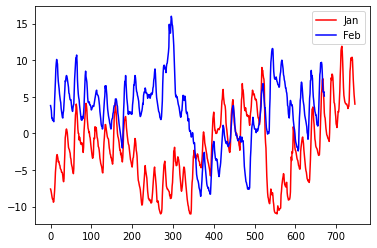

In [644]:
plt.plot(a,color='r',label="Jan")
plt.plot(b,color='b',label="Feb")
plt.legend()
plt.show()

In [645]:
directed_hausdorff(a, b)
#An exception is thrown if u and v do not have the same number of columns

IndexError: tuple index out of range

In [646]:
print(f'1월의 길이 : {len(a)}, 2월의 길이 : {len(b)}')

1월의 길이 : 744, 2월의 길이 : 672


In [647]:
a=a[:672]

In [648]:
print(f'1월의 길이 : {len(a)}, 2월의 길이 : {len(b)}')

1월의 길이 : 672, 2월의 길이 : 672


In [622]:
directed_hausdorff(a, b)

IndexError: tuple index out of range

In [649]:
type(a)

pandas.core.series.Series

In [650]:
a=pd.Series.to_frame(a)
b=pd.Series.to_frame(b)

In [651]:
type(a)

pandas.core.frame.DataFrame

In [652]:
a=a.reset_index()
b=b.reset_index()

In [653]:
directed_hausdorff(a,b)

(19.05885620912231, 292, 283)

In [654]:
a

,index,Temp
0,0,-7.6
1,1,-7.8
2,2,-8.1
3,3,-8.5
4,4,-8.8
...,...,...
667,670,4.4
668,671,2.8
669,672,2.3
670,673,2.1


In [655]:
a=a["Temp"]
b=b["Temp"]
a=np.array(a)
b=np.array(b)

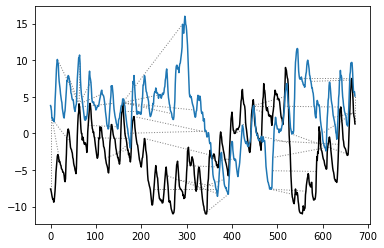

거리:2138.3000000000006


In [656]:
import dtw
dtw.dtw(a,b,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(a,b,keep_internals=True).distance}')

In [657]:
from scipy.spatial import distance
distance.euclidean(a,b)

229.9989782586001

In [658]:
p=df[:747]
q=df[747:1419]
p=p.dropna(axis=0)
q=q.dropna(axis=0)
q=q.reset_index()
q=q.drop(columns=["index"])
p=p["Temp"]
q=q["Temp"]

In [659]:
p=pd.Series.to_frame(p)
q=pd.Series.to_frame(q)

In [660]:
a

array([ -7.6,  -7.8,  -8.1,  -8.5,  -8.8,  -9. ,  -9. ,  -9.4,  -9.3,
        -8.6,  -7.8,  -6.7,  -5.3,  -4.6,  -3.8,  -3.1,  -2.9,  -3.1,
        -3.4,  -3.9,  -3.8,  -4. ,  -4.3,  -4.4,  -4.8,  -4.9,  -5. ,
        -5.3,  -5.3,  -5.4,  -5.8,  -6.4,  -6.6,  -6.2,  -4.2,  -2.8,
        -0.6,  -0.2,   0.4,   0.6,   0.4,   0.1,  -0.6,  -1.2,  -1.9,
        -2.1,  -2.2,  -2.5,  -2.7,  -3.3,  -3.5,  -4.1,  -4.4,  -4.6,
        -5. ,  -5.2,  -5.5,  -4.8,  -2.4,  -0.3,   1.3,   2.5,   2.9,
         4. ,   3.6,   2.8,   1.6,   0.6,   0. ,   0. ,  -0.9,  -0.5,
        -0.7,  -1.1,  -1.4,  -1.5,  -1.3,  -1.3,  -1.6,  -1.9,  -2.6,
        -1.9,   0.2,   1.1,   1.9,   3. ,   3.7,   4.1,   3.8,   3.2,
         2. ,   1.3,   0.7,   0.5,   0.1,   0.2,  -0.4,  -0.6,  -1.2,
        -1.7,  -2.2,  -2.6,  -3.1,  -3.4,  -3.3,  -2.9,  -1. ,  -0.6,
        -0.7,   0.9,   0.4,   0.8,   0.8,   0.2,  -0.5,  -0.7,  -1.1,
        -1.8,  -1.9,  -2.2,  -2.7,  -3.4,  -3.7,  -4.1,  -4.3,  -4.5,
        -4.8,  -5.3,

In [503]:
#dfd
from frechetdist import frdist
frdist(a,b)

20.892343095019285

In [500]:
qqq=a["Temp"]
www=b["Temp"]

In [478]:
#fd
import similaritymeasures

In [501]:
aa = similaritymeasures.frechet_dist(qqq, www)

In [502]:
aa

11.399999999999999

In [ ]:
dfd 파이썬 -> dtw 다차원데이터?

In [504]:
import time
start = time.time()  # 시작 시간 저장
 
from frechetdist import frdist
frdist(a,b)

print("time :", time.time() - start) 

time : 8.33087944984436


In [505]:
import time
start = time.time()  # 시작 시간 저장
 
aa = similaritymeasures.frechet_dist(qqq, www)

print("time :", time.time() - start) 

time : 21.453919410705566


In [543]:
ddff=pd.read_csv(r"climate_multi.csv")

In [544]:
ddff=ddff.drop(columns=["Unnamed: 2"])

In [545]:
ddff

,date,temp,wind_power,wind_direction,moisture
0,2009-01-01 0:00,-7.6,2.1,290.0,55.0
1,2009-01-01 1:00,-7.8,2.3,320.0,54.0
2,2009-01-01 2:00,-8.1,2.0,340.0,52.0
3,2009-01-01 3:00,-8.5,2.4,290.0,52.0
4,2009-01-01 4:00,-8.8,2.1,320.0,53.0
...,...,...,...,...,...
8761,2009-12-31 19:00,-10.3,4.1,290.0,40.0
8762,2009-12-31 20:00,-10.7,1.9,290.0,47.0
8763,2009-12-31 21:00,-11.1,2.1,320.0,48.0
8764,2009-12-31 22:00,-11.6,2.5,290.0,49.0


In [550]:
aa=ddff[:747]
bb=ddff[747:1419]
aa=aa.dropna(axis=0)
bb=bb.dropna(axis=0)
bb=bb.reset_index()
bb=bb.drop(columns=["index"])
aa=aa.drop(columns=["date"])
bb=bb.drop(columns=["date"])
# a=a["Temp"]
# b=b["Temp"]

In [551]:
bb

,temp,wind_power,wind_direction,moisture
0,3.8,3.0,70.0,55.0
1,3.5,2.5,70.0,56.0
2,3.1,2.9,70.0,58.0
3,2.1,2.5,70.0,61.0
4,2.1,2.9,70.0,61.0
...,...,...,...,...
667,6.7,2.6,290.0,34.0
668,5.7,2.8,250.0,39.0
669,5.6,2.4,290.0,41.0
670,5.7,2.6,290.0,37.0


In [552]:
aa

,temp,wind_power,wind_direction,moisture
0,-7.6,2.1,290.0,55.0
1,-7.8,2.3,320.0,54.0
2,-8.1,2.0,340.0,52.0
3,-8.5,2.4,290.0,52.0
4,-8.8,2.1,320.0,53.0
...,...,...,...,...
742,7.3,2.2,20.0,44.0
743,6.3,2.1,50.0,48.0
744,5.3,2.3,50.0,51.0
745,4.7,2.9,50.0,53.0


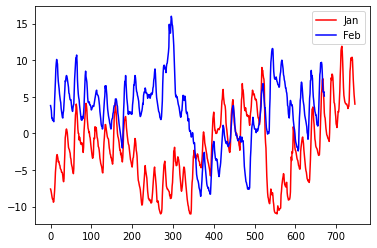

In [554]:
plt.plot(aa["temp"],color='r',label="Jan")
plt.plot(bb["temp"],color='b',label="Feb")
plt.legend()
plt.show()

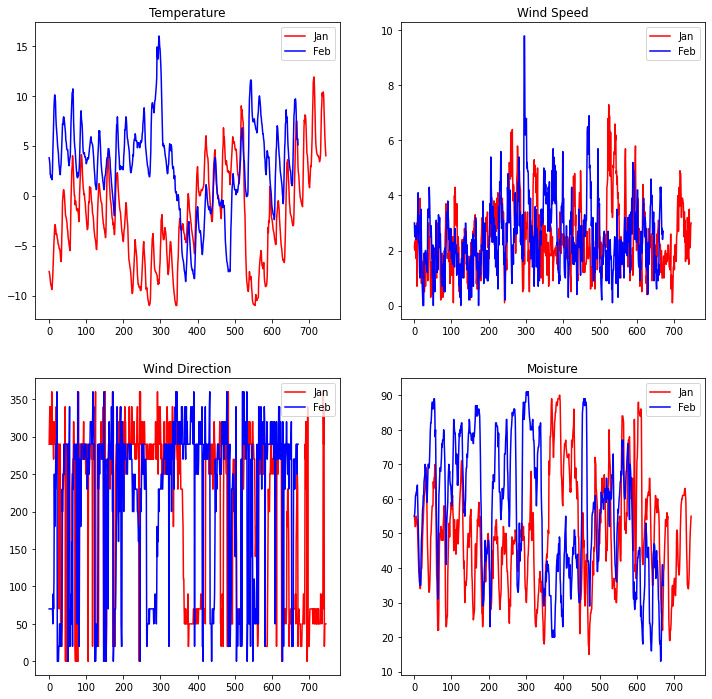

In [570]:
fig,ax=plt.subplots(
2, 2 , figsize=(12,12))

ax[0,0].plot(aa["temp"],color='r')
ax[0,0].plot(bb["temp"],color='b')
ax[0,0].legend(["Jan","Feb"])

ax[0,1].plot(aa["wind_power"],color='r')
ax[0,1].plot(bb["wind_power"],color='b')
ax[0,1].legend(["Jan","Feb"])

ax[1,0].plot(aa["wind_direction"],color='r')
ax[1,0].plot(bb["wind_direction"],color='b')
ax[1,0].legend(["Jan","Feb"])

ax[1,1].plot(aa["moisture"],color='r')
ax[1,1].plot(bb["moisture"],color='b')
ax[1,1].legend(["Jan","Feb"])

ax[0, 0].set_title("Temperature")
ax[0, 1].set_title("Wind Speed")
ax[1, 0].set_title("Wind Direction")
ax[1, 1].set_title("Moisture")


plt.show()

In [607]:
qqqqq=aa.to_numpy()
ttttt=bb.to_numpy()

In [636]:
bbb = similaritymeasures.frechet_dist(aa, bb)

KeyError: 0

In [635]:
distance.euclidean(aa,bb)

ValueError: Input vector should be 1-D.

In [634]:
dtw.dtw(aa,bb,keep_internals=True).distance

47375.732863482015

In [609]:
qqqqq

array([[ -7.6,   2.1, 290. ,  55. ],
       [ -7.8,   2.3, 320. ,  54. ],
       [ -8.1,   2. , 340. ,  52. ],
       ...,
       [  5.3,   2.3,  50. ,  51. ],
       [  4.7,   2.9,  50. ,  53. ],
       [  4. ,   3. ,  50. ,  55. ]])